## O que uma máquima pode saber? Uma investigação com PC e Python

### Luís Carlos Silva Eiras - dez/2019

luiscarloseiras@gmail.com


Este **paper** é o trabalho final do curso ***Matemática para Machine Learning***, da [**Data Science Academy**](https://www.google.com),  ministrado pelo professor Daniel Mendes. 

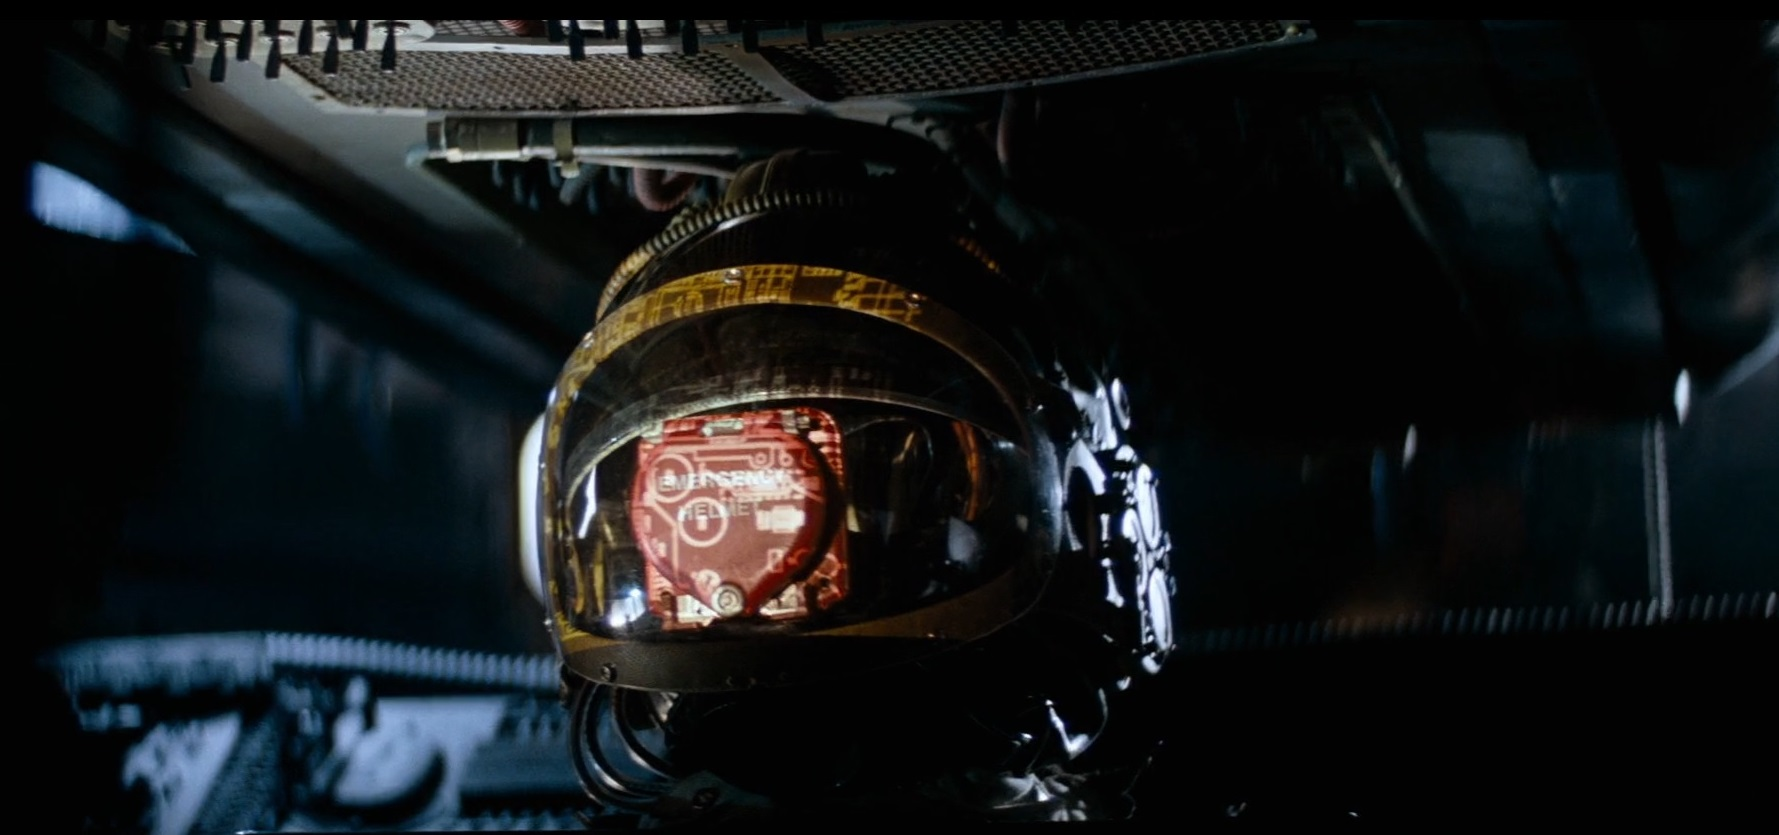

In [1]:
from IPython.display import Image
Image('imagens/Alien1.jpg')

*No filme ***Alien*** (Scott, 1979) o computador Mother acorda a nave Nostromo e os tripulantes*

### 1 - Resumo

*Uma máquina pode pensar?* - pergunta Alan Turing em ***Computadores e inteligência*** (1950). Turing derruba todas as objeções contra a negativa dessa pergunta. Mas, a partir da pergunta de Turing, é possível perguntar, de uma maneira mensurável, *o que uma máquina pode saber?* Não se trata de saber o  que pode ser processado por uma máquina. Isso já foi respondido por Alan Turing em ***Sobre os números computáveis*** (1936), mas de, utilizando-se das tecnologias atuais, que tipo de conhecimento uma máquina pode adquirir - de maneira autônoma - a partir do momento que é ligada. E, depois desse conhecimento medido, como isso pode ser classificado.  

### 2 - Antecedente

Um dos mais antigos e eficazes saberes de máquina é dado pelo regulador de máquina a vapor de Watts,  inventado em 1788 para a Revolução Industrial e citado em todos os livros de cibernética. À medida que aumenta a pressão do vapor, o eixo D gira com maior velocidade levantando as bolas E pela força centrífuga. Esse movimento provoca, através das alavancas, o fechamento da válvula Z, que diminui a pressão do vapor e, consequentemente, diminui da velocidade das bolas, que, por sua vez, libera mais vapor. Assim, abrindo e fechamento conforme a pressão, as máquinas são mantidas em funcionamento na velocidade constante.

A retroalimentação negativa -  um fenômeno aciona mecanismos que o alteram - é utilizado nas técnicas de back propagation utilizadas para treinar redes neurais e no aprendizado por reforço . 

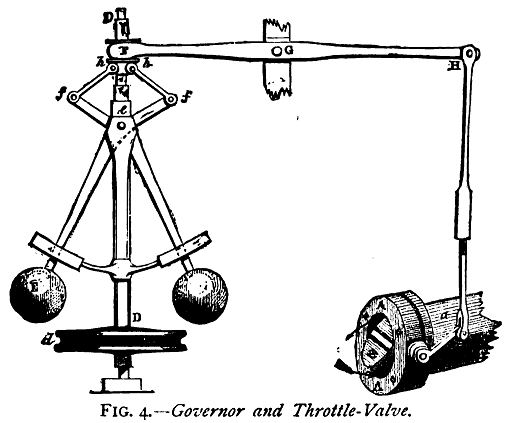

In [2]:
Image('imagens/Watts.png')

### 3 - A máquina 

Para este experimento sobre *o que uma máquina pode saber* foram utilizados: 

- um microcomputador PC; 

- sistema operacional Windows 10 Pro;  

- Python 3.7.3; 

- Jupyter Notebook 6.0.0. 

### 4 - O pseudocódigo 

1. ***Algoritmo*** "O que uma máquina pode saber?"

2. ***Var*** // Declara as variáveis

3. Nome desta máquina, Endereço IP, Latitude, Longitude, Data, Hora, Sistema Operacional, Versão, CPU, GPU, Temperatura CPU, Temperatura GPU: real

4. ***Início***
 
5. - leia $ \leftarrow\$ (Nome desta máquina, Endereço IP, Latitude, Longitude, Data, Hora, Sistema Operacional, Versão, CPU, GPU, Temperatura CPU, Temperetura GPU:real
) // Faz a leitura dos dados das variáveis 
    
6. - planilha $ \leftarrow\$ leia // Gera a planilha das variáveis

7. - codificação $ \leftarrow\$ planilha // Codifica as colunas das variáveis 

8. - redução da dimensionalidade $ \leftarrow\$ codificação  // Faz a redução da dimensionalidade

9. - gráficos $ \leftarrow\$ redução da dimensionalidade // Gera os gráficos para análise

10. - avaliação $ \leftarrow\$ redução da dimensionalidade // Gera a avaliação

11. ***Fim do algoritmo***



### 5 - Pacotes utilizados

In [3]:
import pandas as pd
import numpy as np
import sys
import category_encoders as ce 
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import socket   
import geopandas
import geoplot
import os
import geocoder
from datetime import datetime
import wmi
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')
%matplotlib inline

### 6 - Nome do computador e IP 

In [4]:
hostname = socket.gethostname() 
IPAddr = socket.gethostbyname(hostname)    
print("Nome desta máquina:" + hostname)    
print("Endereço IP:" + IPAddr)  

Nome desta máquina:LuisCarlos
Endereço IP:192.168.1.11


### 7 - Localização 

   Latitude  Longitude                   geometry
0  -19.4683   -42.5367  POINT (-42.5367 -19.4683)


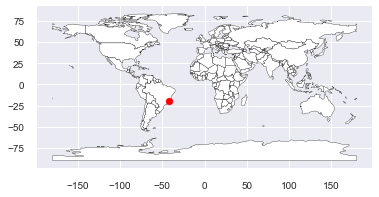

In [6]:
g = geocoder.ip('me')
a = g.lat
b = g.lng

df = pd.DataFrame({'Latitude': [a], 'Longitude': [b]})
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
print(gdf.head())

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black') 
gdf.plot(ax=ax, color='red')
plt.show()

### 8 - Data e hora

In [7]:
data_e_hora_atuais = datetime.now()
data = data_e_hora_atuais.strftime("%d/%m/%Y")
hora = data_e_hora_atuais.strftime("%H:%M:%S")
print(data)
print(hora)

09/12/2019
15:24:31


### 9 - Sistema operacional, CPU, RAM e GPU

In [8]:
computer = wmi.WMI()
computer_info = computer.Win32_ComputerSystem()[0]
os_info = computer.Win32_OperatingSystem()[0]
proc_info = computer.Win32_Processor()[0]
gpu_info = computer.Win32_VideoController()[0]

os_name = os_info.Name.encode('utf-8').split(b'|')[0]
os_version = ' '.join([os_info.Version, os_info.BuildNumber])
system_ram = float(os_info.TotalVisibleMemorySize) / 1048576  # KB to GB

print('OS Name: {0}'.format(os_name))
print('OS Version: {0}'.format(os_version))
print('CPU: {0}'.format(proc_info.Name))
print('RAM: {0} GB'.format(system_ram))
print('Graphics Card: {0}'.format(gpu_info.Name))

OS Name: b'Microsoft Windows 10 Pro'
OS Version: 10.0.17763 17763
CPU: Intel(R) Core(TM) i3-7100 CPU @ 3.90GHz
RAM: 7.944568634033203 GB
Graphics Card: NVIDIA GeForce GTX 1050


### 10 - Temperatura

**Atenção 1:** O programa OpenHardwareMonitor.exe tem que ser executado desde a raiz, isto é, C:/...path.../OpenHardwareMonitor/OpenHardwareMonitor.exe

In [9]:
# import os
os.startfile("C:/Users/WazPC/Desktop/oqueumamaquinapodesaber/OpenHardwareMonitor/OpenHardwareMonitor.exe")

**Atenção 2:** Antes de executar a célula abaixo, aguarde a janela do OpenHardwareMonitor aparecer. 

In [10]:
w = wmi.WMI(namespace='root/OpenHardwareMonitor')
temperature_infos = w.Sensor()
for sensor in temperature_infos:
    if sensor.SensorType==u'Temperature':
        print((sensor.Name),':',(sensor.Value))    

GPU Core : 31.0
Temperature : 35.0
Temperature #4 : 34.0
Temperature #1 : 33.5
Temperature #5 : 34.0
Temperature : 34.0
Temperature #6 : 96.0
CPU Core : 37.0
Temperature #2 : 34.0
Temperature #3 : 34.0
GPU Core : 31.0
Temperature : 35.0
Temperature #4 : 34.0
Temperature #1 : 33.5
Temperature #5 : 34.0
Temperature : 34.0
Temperature #6 : 96.0
CPU Core : 37.0
Temperature #2 : 34.0
Temperature #3 : 34.0


In [11]:
for sensor in temperature_infos:    
    if sensor.Name=="CPU Core":
        df['Temperatura CPU'] = (sensor.Value)
(temperaturaCPU) = df['Temperatura CPU']
for sensor in temperature_infos: 
    if sensor.Name=="Temperature":
        df['Temperatura GPU'] = (sensor.Value)
(temperaturaGPU) = df['Temperatura GPU']

### 11 - Gera, grava e lê a planilha com os dados coletados

In [12]:
df = pd.DataFrame([

    ('Nome desta máquina',format(hostname)),
    ('Endereço IP', format(IPAddr)), 
    ('Latitude', a), 
    ('Longitude', b), 
    ('Data', data),
    ('Hora', hora), 
    ('Sistema Operacional', format(os_name)),
    ('Versão', format(os_version)),
    ('CPU' , format(proc_info.Name)),
    ('RAM(GB)', format(system_ram)),
    ('GPU', format(gpu_info.Name)),
    ('Temperatura CPU',(temperaturaCPU)),
    ('Temperatura GPU',(temperaturaGPU))

    ])  

df.columns = ["saber","dados"]
df

,saber,dados
0,Nome desta máquina,LuisCarlos
1,Endereço IP,192.168.1.11
2,Latitude,-19.4683
3,Longitude,-42.5367
4,Data,09/12/2019
5,Hora,15:24:31
6,Sistema Operacional,b'Microsoft Windows 10 Pro'
7,Versão,10.0.17763 17763
8,CPU,Intel(R) Core(TM) i3-7100 CPU @ 3.90GHz
9,RAM(GB),7.944568634033203


In [13]:
df.to_csv(r'saberdf.csv')

In [14]:
df = pd.read_csv("saberdf.csv", index_col = 0)
df

,saber,dados
0,Nome desta máquina,LuisCarlos
1,Endereço IP,192.168.1.11
2,Latitude,-19.4683
3,Longitude,-42.5367
4,Data,09/12/2019
5,Hora,15:24:31
6,Sistema Operacional,b'Microsoft Windows 10 Pro'
7,Versão,10.0.17763 17763
8,CPU,Intel(R) Core(TM) i3-7100 CPU @ 3.90GHz
9,RAM(GB),7.944568634033203


### 12 - Codifica as colunas da planilha 

In [15]:
# Cria o encoder para duas variáveis
ce_OHE = ce.OneHotEncoder(cols=['saber','dados'])

# Aplica o encoder aos dados
df = ce_OHE.fit_transform(df)

### 13 - O PCA gera os autovetores e autovalores

In [16]:
pca = PCA(n_components=2)
pca.fit(df)
df = pca.transform(df)
print('autovetores:', pca.components_)   
print('autovalores:', pca.explained_variance_) 

autovetores: [[ 2.59220700e-17 -1.25049885e-01  1.05806154e-01  1.13757054e-02
  -5.12819232e-02 -1.92193134e-01  6.98298247e-02 -3.29880874e-01
   8.92816104e-02  5.06278740e-01 -2.14681639e-01  4.43073750e-02
   8.62080461e-02 -8.29580212e-18 -1.25049885e-01  1.05806154e-01
   1.13757054e-02 -5.12819232e-02 -1.92193134e-01  6.98298247e-02
  -3.29880874e-01  8.92816104e-02  5.06278740e-01 -2.14681639e-01
   4.43073750e-02  8.62080461e-02]
 [ 1.00686151e-16 -3.39468886e-01  3.85186046e-01 -2.65533342e-01
   2.65697590e-01 -7.90716982e-04 -6.13346519e-02  2.05362823e-02
   1.06416834e-02 -7.58520964e-03  2.04129869e-01 -2.21721484e-01
   1.02428194e-02 -4.13946686e-17 -3.39468886e-01  3.85186046e-01
  -2.65533342e-01  2.65697590e-01 -7.90716982e-04 -6.13346519e-02
   2.05362823e-02  1.06416834e-02 -7.58520964e-03  2.04129869e-01
  -2.21721484e-01  1.02428194e-02]]
autovalores: [0.16666667 0.16666667]


### 14 - Diagrama de ordenação gerado pelos autovetores

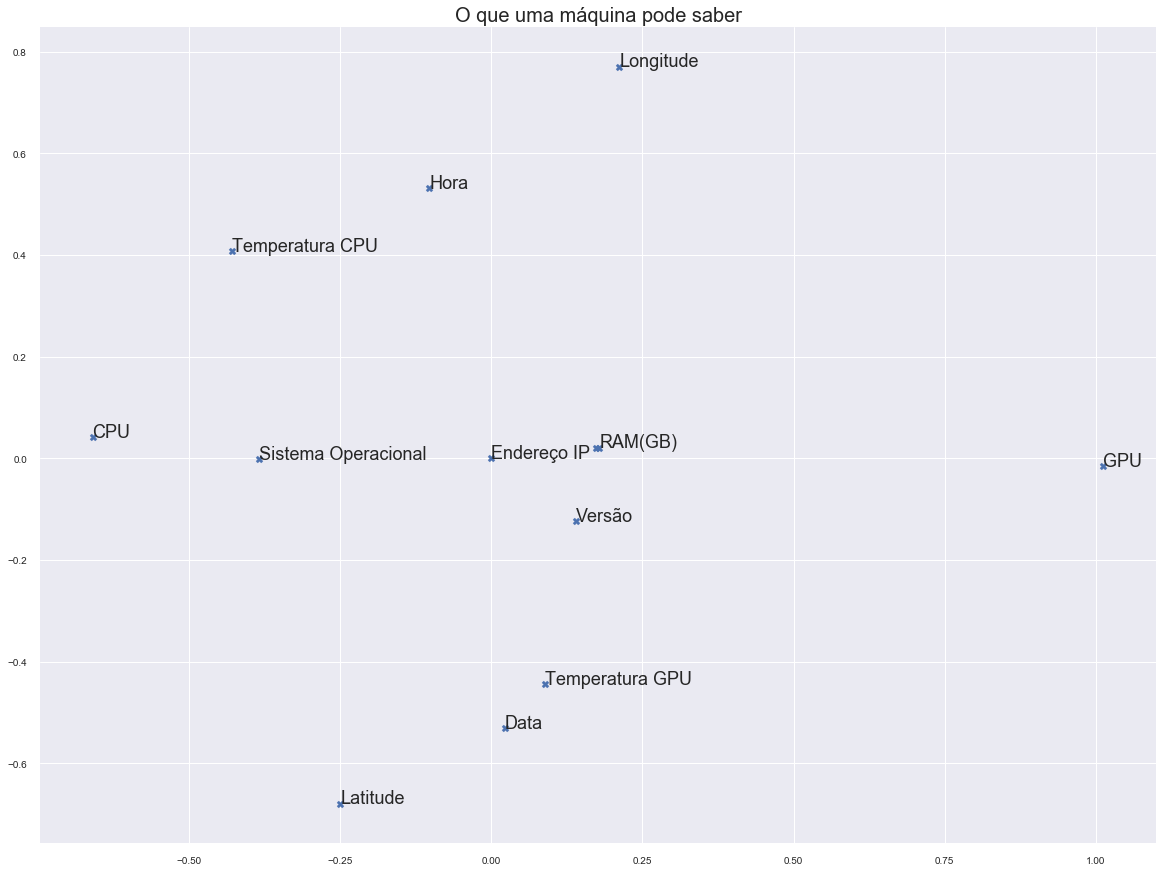

In [17]:
result = pca.fit_transform(df)
X,Y = pca.explained_variance_

# mostra o gráfico de dispersão dos vetores em duas dimensões
plt.figure(figsize=(20,15)) 
plt.rcParams.update({'font.size': 18}) 
plt.title('O que uma máquina pode saber', fontsize=20) 
plt.scatter(result[:, 0], result[:, 1], marker="X")

# mostra os nomes dos vetores
words = list(['Endereço IP', 'Latitude', 'Longitude', 'Data', 'Hora', 'Sistema Operacional', 'Versão', 'CPU', 'RAM(GB)', 
             'GPU', 'Temperatura CPU', 'Temperatura GPU'])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result [i, 0], result[i, 1])) 
  
plt.show()

### 15 - Diagrama da seta gerada pelos autovalores

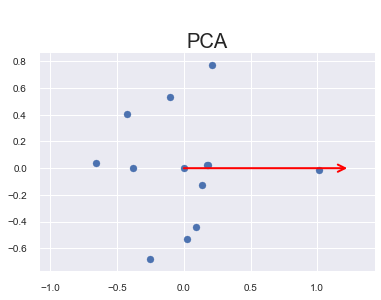

In [18]:
df = pca.transform(df)
pca.fit(df)
plt.scatter(df[:, 0], df[:, 1])
plt.axis('equal');
plt.title('PCA', fontsize=20)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    color='red',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

for length, vector in zip(pca.explained_variance_, pca.components_): 
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');


### 16 - Classificação proposta e classificação desta máquina

In [20]:
df = pd.DataFrame([
    ('0-99','D','Registra e gera o PCA do mecanismo'),
    ('100-999','C','Garante o próprio funcionamento'), 
    ('1000-9999','B','Autorreprodução'),
    ('>10000','A','Emergência: interage com outras máquinas') 
    ])  

df.columns = ["PCA", "Classificação","nota"]
df

,PCA,Classificação,nota
0,0-99,D,Registra e gera o PCA do mecanismo
1,100-999,C,Garante o próprio funcionamento
2,1000-9999,B,Autorreprodução
3,>10000,A,Emergência: interage com outras máquinas


In [22]:
X, Y  = (pca.explained_variance_)
print("Classificação desta máquina:", X*10)
if X < 100:    
    print('Classificação D: Gera a própria classificação')
elif X < 1000:
        print ('Classificação C: Garante o próprio funcionamento')
elif X < 10000:
        print ('Classifição B: Autorreprodução')
else:   
        print ('Classificação A: Emergência - interage com outras máquinas')

Classificação desta máquina: 1.6666666666666672
Classificação D: Gera a própria classificação


### 17 - Conclusões

Muitos outros sensores poderão ser acrescentados a partir da célula [8]. Utilizando-se uma câmera de vídeo, pode-se acrescentar um sensor de movimento e reconhecimento de imagem. Uma ligação com o aplicativo *Science Journal*, do Google, disponível para Android, pode-se ter dados da Luz ambiente (lux), Intensidade do som (dB), Frequência sonora (Hz), Acelerômetro linear (m/s2), Acelerômetro X, Acelerômetro Y, Acelerômetro Z, Barômetro (hPa), Bússola (graus) e Magnetômetro (uT).

Entretanto, ainda que tais sensores aumentem a classificação dada pelo ***autovalor X*** acima, o PC analisado continuará - do ponto de vista da cibernética e da inteligência artificial - uma máquina inferior ao regulador de máquina a vapor de Watts mostrado na célula [2]. O regulador consegue aprender e regular com a única informação que possui, que é a pressão do vapor vinda da caldeira. Já o PC, apesar de capturar informações extraordinárias (localização, o próprio hardware, o sistema operacional etc.) limita-se a se desligar caso a temperatura passe dos 100º C, sendo incapaz de gerar qualquer aprendizado ou conhecimento.

***Para o futuro***

Para que o PC possa ter um aprendizado crescente todas as vezes que for ligado, é preciso acrescentar o módulo ***Recursão*** como sugerido no pseudocódigo abaixo,  e que  esse módulo possa alterar e acrescentar novas funções ao equipamento.

1. ***Algoritmo*** "O que uma máquina pode saber?"

2. ***Base***

3. ***Var*** // Declara as variáveis

4. Nome desta máquina, Endereço IP, Latitude, Longitude, Data, Hora, Sistema Operacional, Versão, CPU, GPU, Temperatura CPU, Temperatura GPU, avaliação anterior, avaliação atual: real

5. ***Início*** // O PC é ligado
 
6. - leia $ \leftarrow\$ (Nome desta máquina, Endereço IP, Latitude, Longitude, Data, Hora, Sistema Operacional, Versão, CPU, GPU, Temperatura CPU, Temperetura GPU:real
) // Faz a leitura dos dados das variáveis 
    
7. - planilha $ \leftarrow\$ leia // Gera a planilha das variáveis

8. - codificação $ \leftarrow\$ planilha // Codifica as colunas das variáveis 

9. - redução da dimensionalidade $ \leftarrow\$ codificação  // Faz a redução da dimensionalidade

10. - gráficos $ \leftarrow\$ redução da dimensionalidade // Gera os gráficos para análise

11. - avaliação $ \leftarrow\$ redução da dimensionalidade // Gera e grava a avaliação

12. ***Recursão***

13. - leia $ \leftarrow\$ avaliação anterior

14. - avaliação atual == avaliação anterior // Compara a avaliação atual com a avaliação anterior

15. - se a avaliação atual for < ou = a avaliação anterior, então 

16. - (Nome desta máquina, Endereço IP, Latitude, Longitude, Data, Hora, Sistema Operacional, Versão, CPU, GPU, Temperatura CPU, Temperetura GPU) $ \leftarrow\$ avaliação

17. - se não, pare.

18. ***Fim do algoritmo***

### 18 - Referências

**Cursos da Data Science Academy:** 

- Matemática para Machine Learning

- Machine Learning

- Python Fundamentos para Análise de Dados

**Livros:** 

***Cibernética e comunicação.*** Isaac Epstein (org). Cultrix, São Paulo, 1973.

***Data science do zero***. Joel Grus. Alta Books, Rio de Janeiro, 2016.

***Entendo: inteligência artificial.*** Henry Brighton, Howard Selina. Leya, São Paulo, 2014.

***Gödel, Escher, Bach.*** Douglas R.  Hofstadter. UnB, Brasília, 2001.

***Introdução à cibernética.*** W. Ross Ashb. Perspectiva, São Paulo, 1970.

***Keras to Kubernetes***. Dattaraj Rao. Wiley, Indianapolis, 2019.

***Mãos à obra: aprendizado de máquina com Scikit-Learn & TensorFlow.*** Aurélien Géron. Alta Books, Rio de Janeiro, 2019. 

***Python para análise de dados.*** Wes McKinney. Novatec, São Paulo, 2018.

**Revistas:**

***Sou humano? Quatro novas avaliações pra medir o grau de inteligência da nova geração de máquinas.*** Gary Marcus. Scientific American, Ano 15, nº 173, abril, 2017, págs. 58-63.

***Beyond the Turing Test.*** Edição especial da AI Magazine, vol. 37, Nº1, 2º trimestre de 2016.



### FIM 

### 19 - Bônus: Como somar laranja com banana

Este paper é um subproduto do paper anterior.

1 - Considerando a lista abaixo e contrariando a sabedoria popular, propõe-se exatamente somar laranja com banana:
 
	• laranja lima, 5
	• banana nanica, 5
	• laranja Bahia, 3
	• banana maçã, 6
	• laranja pera, 4
	• banana prata, 9
	• mexerica, 5
	• banana ouro, 3
	• laranja seleta, 8
	• banana caturra, 6
	• laranja da terra, 4
	• banana figo, 9

2 - Transforma-se a lista numa planilha.

In [9]:
import pandas as pd
df = pd.DataFrame([('laranja lima', 5),('banana nanica', 5), ('laranja Bahia', 3), ('banana maçã', 6),('laranja pera', 4), ('banana prata', 9),('mexerica', 5),('banana ouro', 3),('laranja seleta', 8), ('banana caturra', 6), ('laranja da terra', 4),('banana figo', 9)])  
df.columns = ["fruta","quantidade"]
df

,fruta,quantidade
0,laranja lima,5
1,banana nanica,5
2,laranja Bahia,3
3,banana maçã,6
4,laranja pera,4
5,banana prata,9
6,mexerica,5
7,banana ouro,3
8,laranja seleta,8
9,banana caturra,6


**Primeira solução: a soma por fora.**
    
3 - Cria-se um ente superior chamada *Frutas* e faz se a soma aritmética da quantidade:    
    

In [10]:
class Frutas:
    def __init__(self, soma):
        self.soma = print("Quantidade de frutas:", df['quantidade'].sum())
        
Frutas = Frutas(df)       
print(Frutas)

Quantidade de frutas: 67


**Segunda solução: a soma por dentro.**

4 - Aplica-se o encoder nas colunas.

In [11]:
import category_encoders as ce   

# Cria o encoder para duas variáveis
ce_OHE = ce.OneHotEncoder(cols=['fruta','quantidade'])

# Aplica o encoder aos dados
df = ce_OHE.fit_transform(df)

5 - Aplica-se o PCA.

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
df = pca.transform(df)

6 - Imprime-se os autovalores dos componentes. 

In [13]:
print(pca.components_)

[[ 2.57434718e-01  2.57434718e-01 -9.16743631e-02 -9.16743631e-02
  -9.16743631e-02 -9.16743631e-02  2.57434718e-01 -9.16743631e-02
  -3.89092492e-02 -9.16743631e-02 -9.16743631e-02 -9.16743631e-02
   7.72304154e-01 -1.83348726e-01 -1.83348726e-01 -1.83348726e-01
  -1.83348726e-01 -3.89092492e-02]
 [-7.74630521e-17  3.88269159e-17 -2.33347877e-01  8.60859234e-02
  -1.43119580e-01  2.90381533e-01  2.68067162e-16 -2.33347877e-01
  -1.66942045e-15  8.60859234e-02 -1.43119580e-01  2.90381533e-01
   2.74583768e-16 -4.66695754e-01  1.72171847e-01 -2.86239159e-01
   5.80763066e-01 -1.64345881e-15]]


7 - Imprime-se os autovetores,  que podem ser considerados a "soma" das laranjas ,  bananas e quantidades.

In [14]:
print(pca.explained_variance_)

[0.33976407 0.27272727]


### FIM

### 20 - Avaliação da DSA


Suporte-DSA (Data Science Academy)

9 de dez 22:36 -03

Olá Luís. Realizamos a avaliação do projeto que você desenvolveu.

O seu projeto ficou sensacional. De forma bem prática, reuniu atividades de coleta de dados de forma bem útil, utilizando bibliotecas externas, além das bibliotecas que apresentamos em nossos cursos sobre a linguagem Python. Esse projeto mostrou que você consolidou muito bem o conhecimento desde os fundamentos da linguagem Python, até a compreensão de algoritmos de Machine Learning, como o PCA, e conceitos mais avançados como o eigenvector e eigenvalues.

Outro ponto muito positivo de seu projeto é a documentação bem vasta por meio de comentários e tópicos em markdown. Isso é muito importante, ainda mais quando se tem um projeto que envolve múltiplas etapas de análise de dados como esse seu projeto.

Ter utilizado um escopo bem definido e prático, sem dúvidas alguma, tornou o seu projeto muito promissor. Você mostrou que data science e machine learning, podem sim, ser usados com problemas mais simples também, como um checklist completo dos dados coletados internamente de um computador.

Seu trabalho também contou com ótimos insights desenvolvidos e apresentados por meio da Visualização de Dados. E a propósito, o bônus também ficou muito legal. Parabéns pelo desenvolvimento do projeto. Aproveita para incrementar junto ao portfólio no github, e sinta-se a vontade também para compartilhar o projeto com os demais alunos no Github. Continue trilhando uma excelente jornada de conhecimento em nossos cursos.

Obrigado. Suporte DSA.